In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Load the dataset
data = pd.read_csv('E-commerce Dataset.csv', skiprows=range(0, 1))
data

,1/2/2018,10:56:33,8,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140,1,0.3,46,4.6,Medium,credit_card
0,7/24/2018,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
1,11/8/2018,8:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
2,4/18/2018,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
3,8/13/2018,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
4,7/9/2018,21:57:05,8.0,39783,Female,Web,Member,Auto & Accessories,Bike Tyres,72.0,1.0,0.3,24.0,2.4,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,2/28/2018,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51285,2/28/2018,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51286,2/28/2018,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51287,2/28/2018,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Load the dataset
data = pd.read_csv('E-commerce Dataset.csv')
data['Order_Date'] = pd.to_datetime(data['Order_Date'], errors='coerce')
data['Product_Category'] = data['Product_Category'].fillna('No Category')

data['maximum_profit_margin'] = '20'
data['minimum_profit_margin'] = '10'

data['day_of_week'] = data['Order_Date'].dt.day_name()
data['month'] = data['Order_Date'].dt.month_name()

# def week_of_month(dt):
#     first_day = dt.replace(day=1)
#     dom = dt.day
#     adjusted_dom = dom + first_day.weekday()
#     return int(np.ceil(adjusted_dom / 7))

def week_of_month(dt):
    first_day = dt.replace(day=1)
    first_weekday = first_day.weekday()
    offset = (dt.day + first_weekday - 1) // 7
    return offset + 1

data['week_of_month'] = data['Order_Date'].apply(week_of_month)

data['cost'] = data['Sales'] - data['Profit']

data['order_count'] = data.groupby(['Order_Date','Product'])['Quantity'].transform('sum')
data['total_revenue_per_day'] =data['order_count'] * data['Sales']


new_df = data.groupby(['Order_Date','Product_Category', 'Product','Sales', 'minimum_profit_margin','maximum_profit_margin','week_of_month','month','cost']).size().reset_index(name='order_count')

# Sort the DataFrame by 'Order_Date'
new_df.sort_values(by='Order_Date', inplace=True)
new_df

,Order_Date,Product_Category,Product,Sales,minimum_profit_margin,maximum_profit_margin,week_of_month,month,cost,order_count
0,2018-01-01,Auto & Accessories,Car & Bike Care,118.0,10,20,1,January,84.7,1
34,2018-01-01,Fashion,T - Shirts,248.0,10,20,1,January,82.5,1
35,2018-01-01,Fashion,T - Shirts,248.0,10,20,1,January,85.0,1
36,2018-01-01,Fashion,Titak watch,228.0,10,20,1,January,86.8,1
37,2018-01-01,Fashion,Titak watch,228.0,10,20,1,January,89.1,1
...,...,...,...,...,...,...,...,...,...,...
39475,2018-12-30,Fashion,Fossil Watch,159.0,10,20,5,December,92.7,2
39476,2018-12-30,Fashion,Fossil Watch,159.0,10,20,5,December,111.8,2
39477,2018-12-30,Fashion,Jeans,218.0,10,20,5,December,84.4,1
39468,2018-12-30,Fashion,Formal Shoes,213.0,10,20,5,December,97.0,3


In [ ]:
new_df['average_sales_per_week_of_month'] = new_df.groupby(['month','week_of_month'])['order_count'].transform('mean')

new_df['max'] = new_df.groupby(['week_of_month'])['average_sales_per_week_of_month'].transform('max')
new_df['min'] = new_df.groupby(['week_of_month'])['average_sales_per_week_of_month'].transform('min')
# Calculate 'demand' based on the grouped data

new_df['demand'] =( new_df['average_sales_per_week_of_month'] - new_df['min'])/ ( new_df['max'] - new_df['min'])*100

# print(result_df)
new_df


,Order_Date,Product_Category,Product,Sales,minimum_profit_margin,maximum_profit_margin,week_of_month,month,cost,order_count,average_sales_per_week_of_month,max,min,demand
0,2018-01-01,Auto & Accessories,Car & Bike Care,118.0,10,20,1,January,84.7,1,1.150000,1.420334,1.038462,29.208314
34,2018-01-01,Fashion,T - Shirts,248.0,10,20,1,January,82.5,1,1.150000,1.420334,1.038462,29.208314
35,2018-01-01,Fashion,T - Shirts,248.0,10,20,1,January,85.0,1,1.150000,1.420334,1.038462,29.208314
36,2018-01-01,Fashion,Titak watch,228.0,10,20,1,January,86.8,1,1.150000,1.420334,1.038462,29.208314
37,2018-01-01,Fashion,Titak watch,228.0,10,20,1,January,89.1,1,1.150000,1.420334,1.038462,29.208314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,2018-12-30,Fashion,Fossil Watch,159.0,10,20,5,December,92.7,2,1.314444,1.602283,1.168937,33.577632
39476,2018-12-30,Fashion,Fossil Watch,159.0,10,20,5,December,111.8,2,1.314444,1.602283,1.168937,33.577632
39477,2018-12-30,Fashion,Jeans,218.0,10,20,5,December,84.4,1,1.314444,1.602283,1.168937,33.577632
39468,2018-12-30,Fashion,Formal Shoes,213.0,10,20,5,December,97.0,3,1.314444,1.602283,1.168937,33.577632


(array([5079.,    0., 9353.,    0., 9211.,    0., 8797.,    0., 6775.,
         372.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

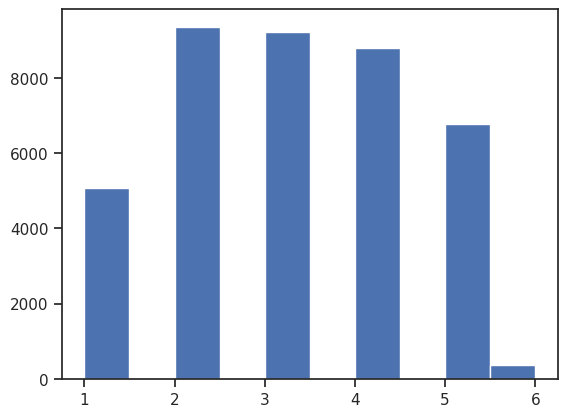

In [ ]:
plt.hist(new_df.week_of_month)

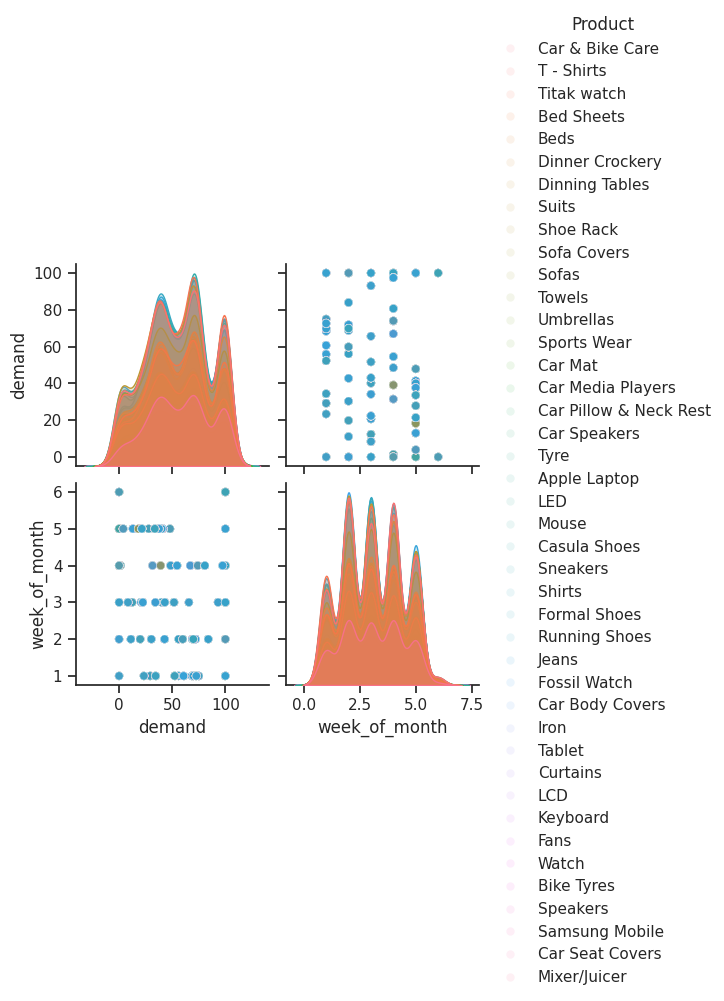

In [ ]:
sns.pairplot(new_df[['demand','week_of_month','Product']], hue = 'Product', plot_kws={'alpha':0.1})

In [ ]:
# Select relevant columns for features and target
features = ['Product', 'Product_Category', 'cost', 'week_of_month','month']
target = 'demand'

X = new_df[features]
y = new_df[target]

# Convert categorical features to one-hot encoding
X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the deep learning model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),  # Add dropout for regularization
    layers.Dense(1)
])

# Adjust the learning rate or use a different optimizer
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.2)




Epoch 1/200
396/396 [==============================] - 2s 3ms/step - loss: 981.6963 - val_loss: 469.3988
Epoch 2/200
396/396 [==============================] - 1s 3ms/step - loss: 497.0205 - val_loss: 421.3747
Epoch 3/200
396/396 [==============================] - 1s 3ms/step - loss: 439.9098 - val_loss: 363.4986
Epoch 4/200
396/396 [==============================] - 1s 3ms/step - loss: 387.3472 - val_loss: 295.3526
Epoch 5/200
396/396 [==============================] - 1s 4ms/step - loss: 327.2965 - val_loss: 227.6417
Epoch 6/200
396/396 [==============================] - 2s 5ms/step - loss: 283.0403 - val_loss: 193.8633
Epoch 7/200
396/396 [==============================] - 1s 3ms/step - loss: 259.0381 - val_loss: 167.4611
Epoch 8/200
396/396 [==============================] - 1s 3ms/step - loss: 240.6054 - val_loss: 153.2083
Epoch 9/200
396/396 [==============================] - 1s 3ms/step - loss: 225.1095 - val_loss: 142.5003
Epoch 10/200
396/396 [==============================] -

In [ ]:
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Evaluate on the test set
y_pred = model.predict(X_test_scaled)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("R-Squared:", r_squared)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

248/248 [==============================] - 0s 2ms/step
R-Squared: 0.992242258283648
MSE: 7.00873922980218
RMSE: 2.6474023551024843
MAE: 2.021767299321395


In [ ]:
X_test

,cost,week_of_month,Product_Apple Laptop,Product_Bed Sheets,Product_Beds,Product_Bike Tyres,Product_Car & Bike Care,Product_Car Body Covers,Product_Car Mat,Product_Car Media Players,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
13800,101.1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
39408,33.5,5,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
30309,90.9,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29033,113.2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19487,66.4,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36593,93.3,2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4538,31.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
25378,0.0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29141,93.1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Assuming sample_input is a dictionary
sample_input = {
    'Product_Apple Laptop': 1,
    'Product_Category_Fashion': 1,
    'cost': 89.8,
    'week_of_month': 3.0,
    'month_December': 1
}
sample_df1 = pd.DataFrame([sample_input])
sample_df1 = sample_df1.reindex(columns=X.columns, fill_value=0)
# Convert sample input to DataFrame

sample_df1 = pd.get_dummies(sample_df1)
sample_df = X_test.head(1)

prediction = model.predict(sample_df)

print(prediction)
sample_df

1/1 [==============================] - 0s 60ms/step
[[91.05521]]


,cost,week_of_month,Product_Apple Laptop,Product_Bed Sheets,Product_Beds,Product_Bike Tyres,Product_Car & Bike Care,Product_Car Body Covers,Product_Car Mat,Product_Car Media Players,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
13800,101.1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
prediction = model.predict(sample_df1)

print(prediction)
sample_df1

1/1 [==============================] - 0s 22ms/step
[[65.11288]]


,cost,week_of_month,Product_Apple Laptop,Product_Bed Sheets,Product_Beds,Product_Bike Tyres,Product_Car & Bike Care,Product_Car Body Covers,Product_Car Mat,Product_Car Media Players,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,89.8,3.0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:

# Assuming sample_input is a dictionary
sample_input = {
    'Product_Apple Laptop': 1,
    'Product_Category_Fashion': 1,
    'cost': 89,
    'week_of_month': 2,
    'month': 1
}
sample_df = pd.DataFrame([sample_input])
sample_df = sample_df.reindex(columns=X.columns, fill_value=0)
# Convert sample input to DataFrame

sample_df = pd.get_dummies(sample_df)
sample_df
prediction = model.predict(sample_df)

print(prediction)


1/1 [==============================] - 0s 62ms/step
[[82.57613]]


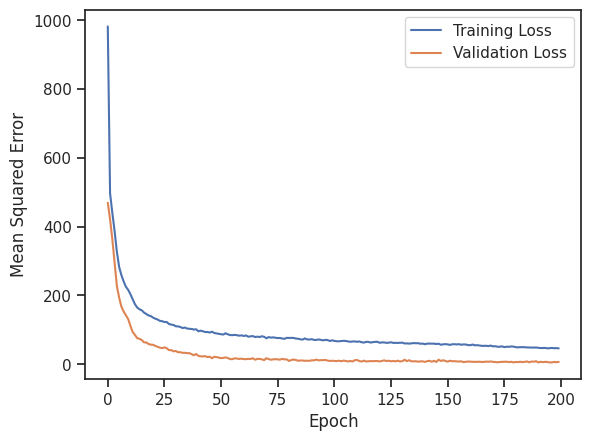

In [ ]:

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

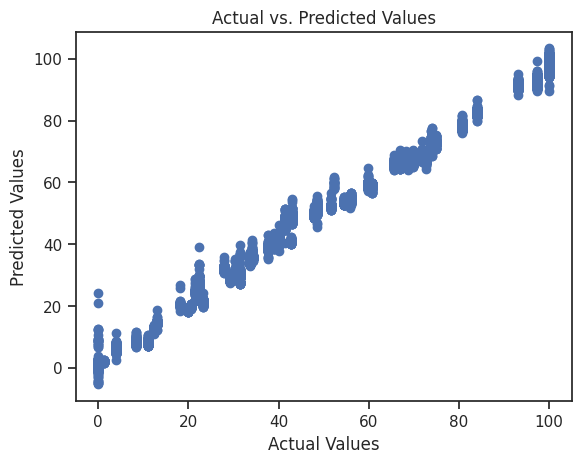

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

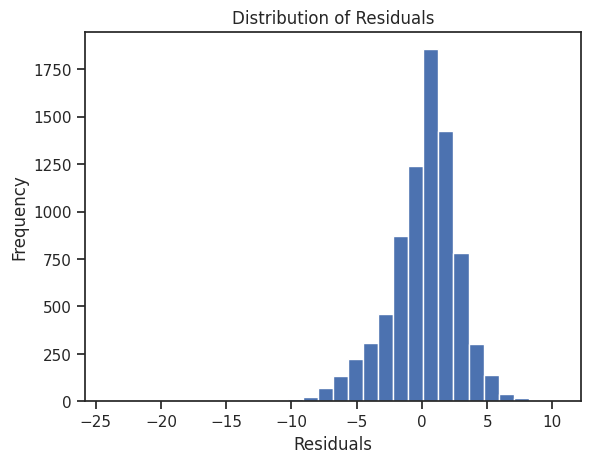

In [ ]:
residuals = y_test - y_pred[:, 0]
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()